In [63]:
from src import *
import networkx as nx
import matplotlib.pyplot as plt

In [64]:
G = nx.karate_club_graph()
# G = nx.barbell_graph(4, 1)

A = nx.adjacency_matrix(G, weight=None)
n = np.size(A, axis=0)

In [68]:
s0 = np.zeros(n)
p_s = 0.2
s0[list(random.sample(range(n), int(p_s * n)))] = 1

gamma = 0.05
tau = 2

contagion_function = lambda nu, b: 1 - (1 - b) ** nu
c1 = contagion_function(np.arange(n), beta)

contagion_function = lambda nu, tau, b: (nu >= tau) * b
c2 = contagion_function(np.arange(n), tau, beta)

n1 = 10
n2 = 10

beta = np.linspace(0, 1, n1)
fraction = np.linspace(0, 1, n2)
l = np.array((n1, n2))
realizations = 100

for i, b in enumerate(beta):
    for j, f in enumerate(fraction):
        k = 0
        while k < realizations:
            x = contagion_process(A, gamma, c2, s0, tmin=0, tmax=100, random_seed=None)

            k += 1

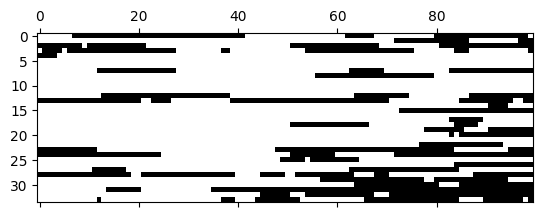

In [69]:
plt.spy(x.T)

In [70]:
def pairplot(nu1, nu2, c, x, A, samples):

    l = np.zeros((samples, samples))
    ctemp = c.copy()
    for i, c1 in enumerate(np.linspace(0, 1, samples)):
        for j, c2 in enumerate(np.linspace(0, 1, samples)):
            ctemp[nu1] = c1
            ctemp[nu2] = c2
            l[i, j] = log_likelihood(x, A, ctemp)
    return l

In [71]:
nu1 = 0
nu2 = 3
samples = 100

l1 = pairplot(nu1, nu2, c1, x, A, samples)
l2 = pairplot(nu1, nu2, c2, x, A, samples)

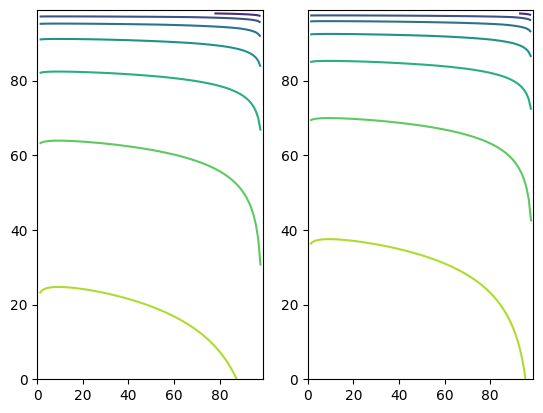

In [78]:
plt.figure()
plt.subplot(121)
plt.contour(l1)

plt.subplot(122)
plt.contour(l2)